# Datos de corrientes
Este documento se centra sobre la lectura y la representación de datos de corrientes en oceanografía.
![Captura de pantalla de https://earth.nullschool.net](img/currents.png)

La figura es una captura de pantalla de https://earth.nullschool.net, donde observamos las corrientes en el Pacífico Ecuatorial, a una profundidad de 5 metros.

## Cómo se miden las corrientes?       

Existen varias maneras de medir las corrientes a la superficie del océano (mientras la estimación de la velocidad a varias profundidades resulta más complejo)

- con **boyas de derivas** (_drifting buoys_): proporcionan una serie de posiciones, adquiridas por satélite, que permiten estimar la corriente de superficie;
- con un **radar de alta frecuencia** (_HF radar_): proporcionan las corrientes en una zona determinada, gracias a un sistema de antenas;
- con **satélites de altimetría**: las misiones de altimetría proporcionan medidas de anomalías del nivel del mar (_sea level anomalies_), y a partir de ellas se puede derivar las corrientes geostróficas.
- con un **Perfilador Acústico de corrientes Doppler** (_Acoustic Doppler Current Profiler_, ADCP): mide la velocidad a varias distancias del sensor.

In [4]:
import os
import datetime
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cmocean
coast_f = cfeature.GSHHSFeature(scale="f")
mainproj = ccrs.Mercator(central_longitude=-30.0, min_latitude=-20.0, max_latitude=20.0)
datacrs = ccrs.PlateCarree()

## 1. Datos de radar


In [2]:
dataURL = "http://thredds.socib.es/thredds/dodsC/hf_radar/hf_radar_ibiza-scb_codarssproc001/L1/dep0001_hf-radar-ibiza_scb-codarssproc001_L1_latest.nc"

In [3]:
radardata = xr.open_dataset(dataURL)
radardata

<xarray.Dataset>
Dimensions:            (time: 1188, lat: 30, lon: 27)
Coordinates:
  * time               (time) datetime64[ns] 2024-10-01 ... 2024-11-19T11:00:00
    LAT                (lat) float64 ...
    LON                (lon) float64 ...
Dimensions without coordinates: lat, lon
Data variables: (12/23)
    U                  (time, lat, lon) float64 ...
    QC_U               (time, lat, lon) float32 ...
    V                  (time, lat, lon) float64 ...
    QC_V               (time, lat, lon) float32 ...
    WSPE               (time, lat, lon) float64 ...
    QC_WSPE            (time, lat, lon) float32 ...
    ...                 ...
    RABA_FORM          (time) float64 ...
    QC_RABA_FORM       (time) float32 ...
    RABA_DIFF_GALF     (time) float64 ...
    QC_RABA_DIFF_GALF  (time) float32 ...
    RABA_DIFF_FORM     (time) float64 ...
    QC_RABA_DIFF_FORM  (time) float32 ...
Attributes: (12/58)
    title:                               Data from instrument SCB-CODARSSPROC...
    institution:                         SOCIB (Sistema de Observación y pred...
    netcdf_version:                      3.0
    Conventions:                         CF-1.6
    abstract:                            Real-time surface current data in th...
    summary:                             Real-time surface current data in th...
    ...                                  ...
    distribution_statement:              Approved for public release. Distrib...
    license:                             Approved for public release. Distrib...
    citation:                            Balearic Island Coastal and Observin...
    acknowledgement:                     Ministerio de ciencia e innovación (...
    update_interval:                     every 3600 seconds
    DODS_EXTRA.Unlimited_Dimension:      time

Seleccionamos el último periodo de tiempo:

In [7]:
radardata.time[-1]

<xarray.DataArray 'time' ()> Size: 8B
array('2024-11-19T11:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2024-11-19T11:00:00
Attributes:
    standard_name:  time
    axis:           T

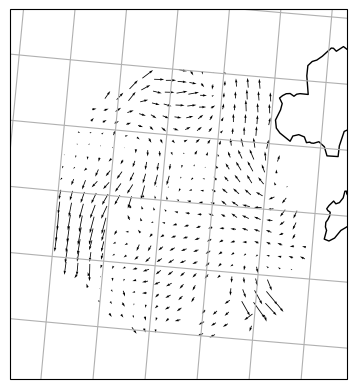

In [8]:
fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.EuroPP())
ax.quiver(radardata.LON, radardata.LAT, radardata.U[-10,:,:].values, radardata.V[-10,:,:].values, transform=datacrs)
ax.set_extent([radardata.LON[0], radardata.LON[-1], radardata.LAT[0], radardata.LAT[-1]])
ax.coastlines()
ax.gridlines()

## 2. Modelo numérico

Aquí vemos un ejemplo de datos de corrientes extraidos del model global de Copernicus Marine Service.<br>
La captura de pantalla muestra un ejemplo de como extraer datos en una zona concreta (y así reducir el tamaño de los ficheros).

https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_PHY_001_024/description

![Selección de datos desde Copernicus Marine](img/CMEMSdownload.png)

### Fichero de datos

In [9]:
shareddir = "/home/jovyan/shared-readwrite/ohwe24_hackaton/"
currentfile = os.path.join(shareddir, "datos_corrientes_mod/cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_1731678780714.nc")
currentfile = "cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_1731678780714.nc"

### Lectura

In [9]:
datacurrent = xr.open_dataset(currentfile)
datacurrent

<xarray.Dataset> Size: 3MB
Dimensions:    (time: 1, depth: 1, latitude: 481, longitude: 840)
Coordinates:
  * time       (time) datetime64[ns] 8B 2024-11-24
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 2kB -20.0 -19.92 -19.83 ... 19.83 19.92 20.0
  * longitude  (longitude) float32 3kB -140.0 -139.9 -139.8 ... -70.17 -70.08
Data variables:
    uo         (time, depth, latitude, longitude) float32 2MB ...
    vo         (time, depth, latitude, longitude) float32 2MB ...
Attributes:
    Conventions:       CF-1.11
    title:             daily mean fields from Global Ocean Physics Analysis a...
    institution:       Mercator Ocean International
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    source:            MOI GLO12
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           https://marine.copernicus.eu/contact
    references:        http://marine.copernicus.eu
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_ANALYSISFORECAST_PHY_001_024
    subset:datasetId:  cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_202406
    subset:date:       2024-11-15T13:53:00.715Z

Corrientes a la superficie del mar, en el primer periodo de tiempo:

In [14]:
u =  datacurrent["uo"][0,0,:,:]
v =  datacurrent["vo"][0,0,:,:]
magnitude = (u ** 2 + v ** 2) ** 0.5

### Por componente

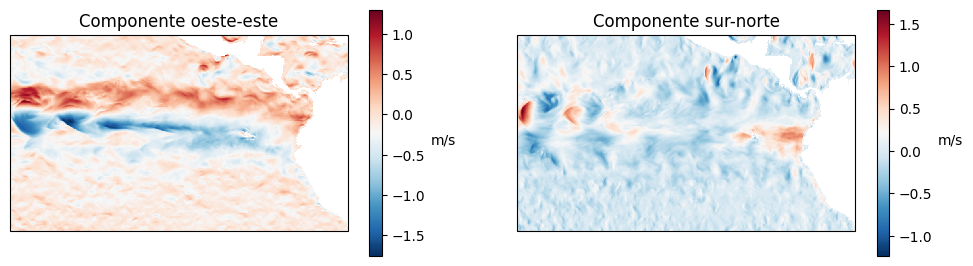

In [15]:
domain = [datacurrent["longitude"].min(), datacurrent["longitude"].max(), datacurrent["latitude"].min(), datacurrent["latitude"].max()]

fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot(121, projection=mainproj)
ax1.set_extent(domain)
pcm1 = ax1.pcolormesh(datacurrent["longitude"], datacurrent["latitude"], u, transform=datacrs, cmap=plt.cm.RdBu_r)
ax1.set_title("Componente oeste-este")
cb1 = plt.colorbar(pcm1, shrink=0.4)
cb1.set_label("m/s", rotation=0, ha="left")

ax2 = plt.subplot(122, projection=mainproj)
ax2.set_extent(domain)
pcm2 = ax2.pcolormesh(datacurrent["longitude"], datacurrent["latitude"], v, transform=datacrs, cmap=plt.cm.RdBu_r)
ax2.set_title("Componente sur-norte")
cb2 = plt.colorbar(pcm2, shrink=0.4)
cb2.set_label("m/s", rotation=0, ha="left")
plt.show()

### Vectores
La longitud de cada flecha depende de la velocidad de la corriente.      
Es necesario adaptar los parametros 
- `regrid_shape` (densidad de vectores) y
- `width` (ancho de la flecha)

para obtener una figura visualmente correcta.

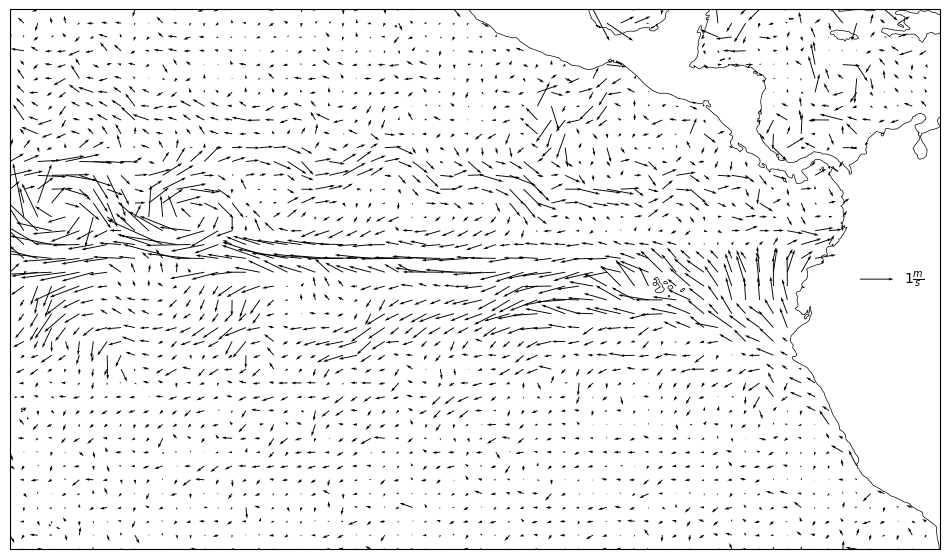

In [16]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=mainproj)
ax.set_extent(domain)
qv = ax.quiver(datacurrent["longitude"], datacurrent["latitude"], u, v, 
                  regrid_shape=40, transform=datacrs, width=.001)
qk = ax.quiverkey(qv, 0.95, 0.5, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='axes')
ax.coastlines(lw=.5)

### Vectores con colores
El color cambia según la velocidad de la corriente.

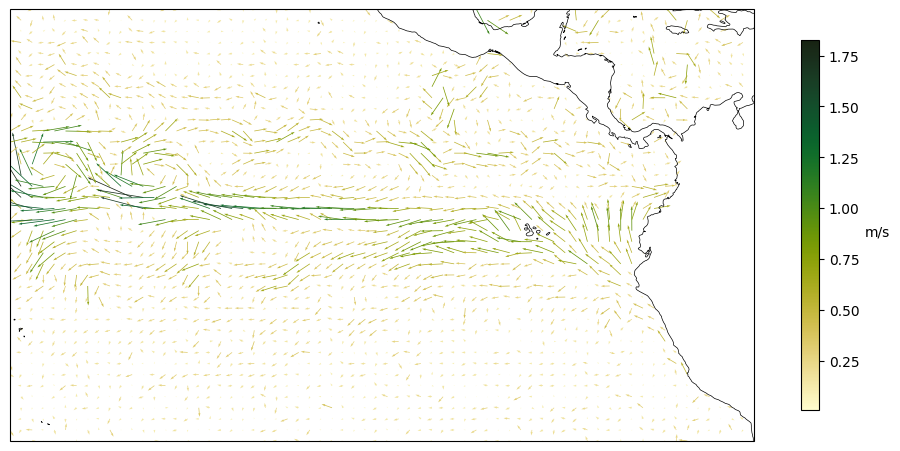

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=mainproj)
ax.set_extent(domain)
qv = ax.quiver(datacurrent["longitude"].values, datacurrent["latitude"].values, u, v, magnitude,
                  regrid_shape=40, transform=datacrs, width=.001, cmap=cmocean.cm.speed)
cb = plt.colorbar(qv, shrink=.6)
cb.set_label("m/s", rotation=0, ha="left")
ax.coastlines(lw=.5)

### Líneas de corriente
Otra manera de representar el campo de velocidad, a través de las lineas de corrientes.     
El parametro `density` controla la densidad de líneas de corriente; aumentar el valor de este parametro aumenta el tiempo de cálculo.

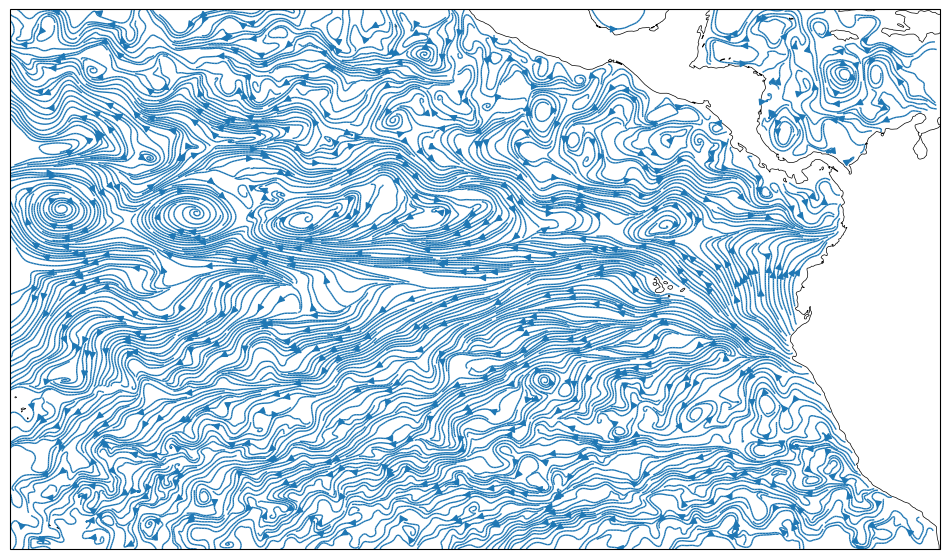

In [18]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=mainproj)
ax.set_extent(domain)
ax.streamplot(datacurrent["longitude"].values, datacurrent["latitude"].values, u, v, transform=datacrs, 
              linewidth=1, density=10)
ax.coastlines(lw=.5)

## Detección y seguimiento de remolinos

Un remolino (_eddy_) se puede definir como una corriente circular de agua. Existen en todos los oceanos y a varios nivels de profundidad.
Hay 2 tipos de remolinos principales: 
- los anticiclónico, con agua menos densa (por ej. más calida) dentro del remolino que en el exterior
- los ciclónico, con agua más densa en el interior.

El sentido de rotación depende del hemisferio donde nos encontramos

|  | anticiclónico | anticiclónico |
| --- | --- | --- |
| Hemisferio sur   | 	en sentido horario | antihorario  |
| Hemisferio norte | antihorario | en sentido horario | 


__Por qué nos interesan los remolinos?__ porque transportan aguas con caracteristicas distintas del agua donde se mueven. Tienen un papel el la circulación oceánica y afectan al clima a varias escalas.

El `eddy tracking` consiste en detectar los remolinos (_eddies_) a partir de datos de anomalías de nivel del mar y velocidades de corriente, para luego seguir sus desplazamientos (_tracking_). 

![Captura de pantalla de https://earth.nullschool.net](img/remolino.png)

Existen varios algoritmos para esta tarea, aquí trabajamos con el código [PyEddyTracker](https://py-eddy-tracker.readthedocs.io/en/stable/).

> Mason, E., A. Pascual, and J. C. McWilliams, 2014: A New Sea Surface Height–Based Code for Oceanic Mesoscale Eddy Tracking. _J. Atmos. Oceanic Technol._, **31**, 1181–1188, https://doi.org/10.1175/JTECH-D-14-00019.1.

El método se puede aplicar: 
- a datos de satélites
- a salidos de modelos numéricos.

En este ejemplo vamos a trabajar con datos de altimetría.

In [5]:
# currentfile_alti = os.path.join(shareddir, "datos_corrientes_sat/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1731685959908.nc")
currentfile_alti = "cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1731685959908.nc"

In [6]:
import py_eddy_tracker
from py_eddy_tracker.dataset.grid import RegularGridDataset

ImportError: cannot import name 'float_' from 'numpy' (/home/ctroupin/.virtualenv/OHW2024/lib/python3.12/site-packages/numpy/__init__.py)

La primera etapa consiste en leer los datos, en este caso de altimetría, indicando los nombres de las variables que contienen las coordenadas:

In [6]:
h = RegularGridDataset(currentfile_alti, "longitude", "latitude")

We assume pixel position of grid is centered for cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1731685959908.nc


En la segunda etapa, se aplica y filtro de paso alto (para atenúar los componentes de baja frecuencia).

In [7]:
h.bessel_high_filter("adt", 500, order=3)

En la etapa final, se procede a la detección de los remolinos. Indicamos
- la variable de altimetría utilizada para la detección (suele ser ´adt´ o ´sla´)
- las variables que contienen la velocidad (`ugos` y `vgos`)
- el tiempo (tiene que corresponder con el periodo de datos disponibles en el fichero, en este caso desde enero 2023 hasta junion 2023)
- otros parametros que permiten afinar la detección.

In [8]:
a, c = h.eddy_identification(
    "adt",
    "ugos",
    "vgos",  # Variables used for identification
    datetime.datetime(2023, 1, 5),  # Date of identification
    0.001,  # step between two isolines of detection (m)
    pixel_limit=(5, 500),  # Min and max pixel count for valid contour
    shape_error=55,  # Error max (%) between ratio of circle fit and contour
)

/home/ctroupin/.virtualenv/PPPP/lib/python3.10/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


La ejecución de `eddy_identification` crea como resultado `a` (remolinos anticiclónicos) y `c` (remolinos ciclónicos). 

### Figuras
Representamos los remolinos en el mapa.

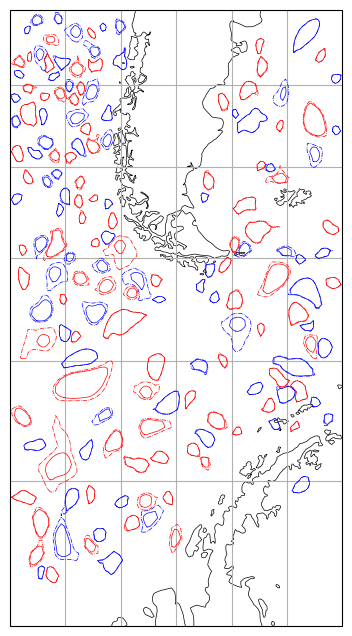

In [9]:
mainproj2 = ccrs.Mercator(central_longitude=-60.0, min_latitude=-70.0, max_latitude=0.)

fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111, projection=mainproj2)
ax.set_extent([-85, -55., -70., -40.])
ax.gridlines()
ax.coastlines(lw=.5)
a.display(ax, color="b", linewidth=0.5, transform=ccrs.PlateCarree())
c.display(ax, color="r", linewidth=0.5, transform=ccrs.PlateCarree())

plt.show()

### Características de los remolinos
#### Radio

Text(0.5, 0, 'Radio (m)')

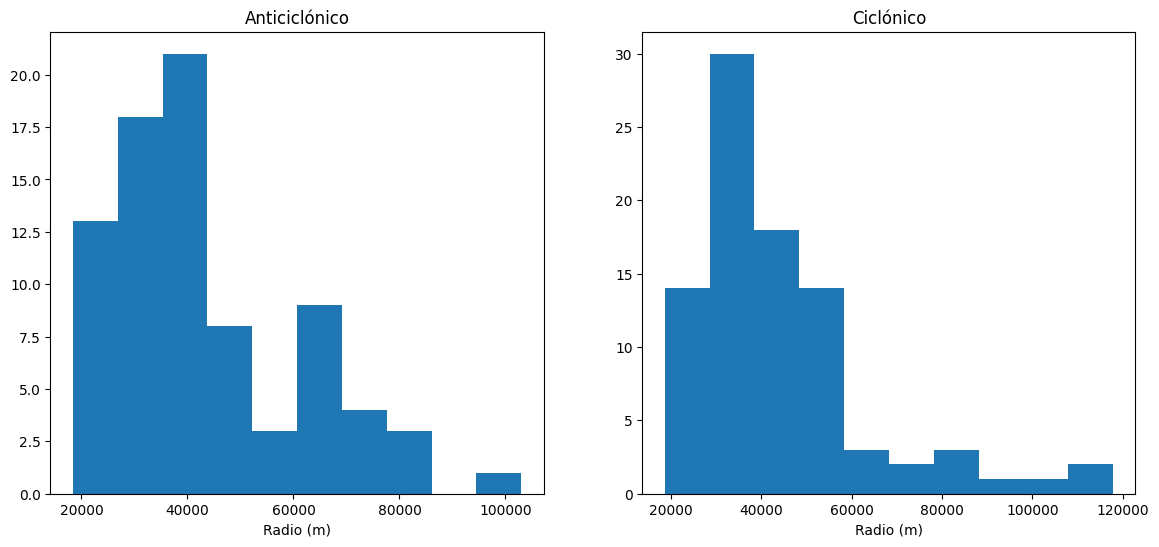

In [16]:
fig = plt.figure(figsize=(14, 6))
ax = plt.subplot(121)
ax.hist(a.effective_radius)
ax.set_title("Anticiclónico")
ax.set_xlabel("Radio (m)")
ax = plt.subplot(122)
ax.hist(c.effective_radius)
ax.set_title("Ciclónico")
ax.set_xlabel("Radio (m)")

## El challenge
1. Elejir una zona geográfica
2. Bajar los datos de altimetría (producto [SEALEVEL_GLO_PHY_L4_MY_008_047](https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047))
3. Applicar la detección de remolinos en varios periodos (por ejemplos diferentes años)
4. Comparar la distribución espacial de remolinos
5. Comparar características de los remolinos.